# Pokemon Data Analysis with Python

The amazing world of Pokemon spans a total of 8 generations, consisting of different species and types. We'll now analyze a dataset of all Pokemon from all the 8 generations and try to find patterns and trends among the types and statistics.

## Importing the libraries

Firstly, we'll import all the necessary libraries, like Pandas and NumPy, alongside, tools needed for data visualization. like Matplotlib and Seaborn.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Importing the dataset

Next, we'll import the pokedex dataset which includes all the data of the Pokemon.

In [2]:
poke = pd.read_csv('pokedex.csv')

poke.head(10)

,Unnamed: 0,pokedex_number,name,german_name,japanese_name,generation,is_sub_legendary,is_legendary,is_mythical,species,...,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy
0,0,1,Bulbasaur,Bisasam,フシギダネ (Fushigidane),1,0,0,0,Seed Pokémon,...,1.0,2.0,2.0,1.00,1.0,1.0,1.0,1.0,1.0,0.5
1,1,2,Ivysaur,Bisaknosp,フシギソウ (Fushigisou),1,0,0,0,Seed Pokémon,...,1.0,2.0,2.0,1.00,1.0,1.0,1.0,1.0,1.0,0.5
2,2,3,Venusaur,Bisaflor,フシギバナ (Fushigibana),1,0,0,0,Seed Pokémon,...,1.0,2.0,2.0,1.00,1.0,1.0,1.0,1.0,1.0,0.5
3,3,3,Mega Venusaur,Bisaflor,フシギバナ (Fushigibana),1,0,0,0,Seed Pokémon,...,1.0,2.0,2.0,1.00,1.0,1.0,1.0,1.0,1.0,0.5
4,4,4,Charmander,Glumanda,ヒトカゲ (Hitokage),1,0,0,0,Lizard Pokémon,...,2.0,1.0,1.0,0.50,2.0,1.0,1.0,1.0,0.5,0.5
5,5,5,Charmeleon,Glutexo,リザード (Lizardo),1,0,0,0,Flame Pokémon,...,2.0,1.0,1.0,0.50,2.0,1.0,1.0,1.0,0.5,0.5
6,6,6,Charizard,Glurak,リザードン (Lizardon),1,0,0,0,Flame Pokémon,...,0.0,1.0,1.0,0.25,4.0,1.0,1.0,1.0,0.5,0.5
7,7,6,Mega Charizard X,Glurak,リザードン (Lizardon),1,0,0,0,Flame Pokémon,...,2.0,1.0,1.0,0.50,2.0,1.0,2.0,1.0,0.5,1.0
8,8,6,Mega Charizard Y,Glurak,リザードン (Lizardon),1,0,0,0,Flame Pokémon,...,0.0,1.0,1.0,0.25,4.0,1.0,1.0,1.0,0.5,0.5
9,9,7,Squirtle,Schiggy,ゼニガメ (Zenigame),1,0,0,0,Tiny Turtle Pokémon,...,1.0,1.0,1.0,1.00,1.0,1.0,1.0,1.0,0.5,1.0


Next, we'll see the shape of the dataset and count the the number of values in each column.

In [3]:
print(poke.shape)
poke.count()

(1028, 53)


Unnamed: 0          1028
pokedex_number      1028
name                1028
german_name          938
japanese_name        938
generation          1028
is_sub_legendary    1028
is_legendary        1028
is_mythical         1028
species             1027
type_number         1028
type_1              1027
type_2               541
height_m            1027
weight_kg           1026
abilities_number    1028
ability_1           1024
ability_2            512
ability_hidden       810
total_points        1027
hp                  1027
attack              1027
defense             1027
sp_attack           1027
sp_defense          1027
speed               1027
catch_rate           923
base_friendship      923
base_experience      923
growth_rate         1026
egg_type_number     1028
egg_type_1          1024
egg_type_2           282
percentage_male      791
egg_cycles          1026
against_normal      1027
against_fire        1027
against_water       1027
against_electric    1027
against_grass       1027


#### The dataset has 1028 rows and 53 columns.

In [7]:
poke.dtypes

Unnamed: 0            int64
pokedex_number        int64
name                 object
german_name          object
japanese_name        object
generation            int64
is_sub_legendary      int64
is_legendary          int64
is_mythical           int64
species              object
type_number           int64
type_1               object
type_2               object
height_m            float64
weight_kg           float64
abilities_number      int64
ability_1            object
ability_2            object
ability_hidden       object
total_points        float64
hp                  float64
attack              float64
defense             float64
sp_attack           float64
sp_defense          float64
speed               float64
catch_rate          float64
base_friendship     float64
base_experience     float64
growth_rate          object
egg_type_number       int64
egg_type_1           object
egg_type_2           object
percentage_male     float64
egg_cycles          float64
against_normal      

#### 1. Filter by Pokemon

#### a. Competitive statistics

Firstly, we'll analyze the dataset in terms of the listed Pokemon. We'll take a look at the competitive statistics first and determine the top 10 Pokemon for the following stats - attack, special attack, defense, special defense, speed, hp and base total.

#### Top 10 Pokemon with the highest  physical attack

In [7]:
poke.groupby('name')['attack'].mean().sort_values(ascending=False).head(10)

name
Mega Mewtwo X           190.0
Mega Heracross          185.0
Kartana                 181.0
Mega Rayquaza           180.0
Deoxys Attack Forme     180.0
Primal Groudon          180.0
Mega Garchomp           170.0
Black Kyurem            170.0
Zacian Crowned Sword    170.0
Ultra Necrozma          167.0
Name: attack, dtype: float64

#### Top 10 Pokemon with the highest physical defense

In [8]:
poke.groupby('name')['defense'].mean().sort_values(ascending=False).head(10)

name
Eternatus Eternamax    250.0
Mega Aggron            230.0
Shuckle                230.0
Mega Steelix           230.0
Stakataka              211.0
Steelix                200.0
Regirock               200.0
Avalugg                184.0
Cloyster               180.0
Mega Slowbro           180.0
Name: defense, dtype: float64

#### Top 10 Pokemon with the highest special attack

In [9]:
poke.groupby('name')['sp_attack'].mean().sort_values(ascending=False).head(10)

name
Mega Mewtwo Y          194.0
Mega Rayquaza          180.0
Primal Kyogre          180.0
Deoxys Attack Forme    180.0
Mega Alakazam          175.0
Xurkitree              173.0
Hoopa Hoopa Unbound    170.0
Mega Gengar            170.0
White Kyurem           170.0
Ultra Necrozma         167.0
Name: sp_attack, dtype: float64

#### Top 10 Pokemon with the highest special defense

In [10]:
poke.groupby('name')['sp_defense'].mean().sort_values(ascending=False).head(10)

name
Eternatus Eternamax     250.0
Shuckle                 230.0
Regice                  200.0
Primal Kyogre           160.0
Deoxys Defense Forme    160.0
Ho-oh                   154.0
Florges                 154.0
Lugia                   154.0
Mega Latias             150.0
Diancie                 150.0
Name: sp_defense, dtype: float64

#### Top 10 Pokemon with the highest speed

In [11]:
poke.groupby('name')['speed'].mean().sort_values(ascending=False).head(10)

name
Deoxys Speed Forme      180.0
Ninjask                 160.0
Pheromosa               151.0
Mega Alakazam           150.0
Mega Aerodactyl         150.0
Electrode               150.0
Deoxys Attack Forme     150.0
Deoxys Normal Forme     150.0
Zacian Crowned Sword    148.0
Mega Sceptile           145.0
Name: speed, dtype: float64

#### Top 10 Pokemon with the highest HP

In [12]:
poke.groupby('name')['hp'].mean().sort_values(ascending=False).head(10)

name
Eternatus Eternamax       255.0
Blissey                   255.0
Chansey                   250.0
Guzzlord                  223.0
Zygarde Complete Forme    216.0
Wobbuffet                 190.0
Wailord                   170.0
Alomomola                 165.0
Snorlax                   160.0
Giratina Origin Forme     150.0
Name: hp, dtype: float64

#### Top 10 Pokemon with the highest BST

In [13]:
poke.groupby('name')['total_points'].mean().sort_values(ascending=False).head(10)

name
Eternatus Eternamax         1125.0
Mega Rayquaza                780.0
Mega Mewtwo Y                780.0
Mega Mewtwo X                780.0
Primal Kyogre                770.0
Primal Groudon               770.0
Ultra Necrozma               754.0
Arceus                       720.0
Zamazenta Crowned Shield     720.0
Zacian Crowned Sword         720.0
Name: total_points, dtype: float64

#### b. Physical attributes

Now, we'll take a look at the top 10 Pokemon with certain physical attributes - height, weight, base friendship, base experience and catch rate.

#### Top 10 Tallest Pokemon in metres

In [15]:
poke.groupby('name')['height_m'].mean().sort_values(ascending=False).head(10)

name
Eternatus Eternamax    100.0
Eternatus               20.0
Wailord                 14.5
Alolan Exeggutor        10.9
Mega Rayquaza           10.8
Mega Steelix            10.5
Primal Kyogre            9.8
Celesteela               9.2
Steelix                  9.2
Onix                     8.8
Name: height_m, dtype: float64

#### Top 10 Heaviest Pokemon in kilograms

In [16]:
poke.groupby('name')['weight_kg'].mean().sort_values(ascending=False).head(10)

name
Celesteela        999.9
Cosmoem           999.9
Primal Groudon    999.7
Groudon           950.0
Eternatus         950.0
Mega Metagross    942.9
Mudsdale          920.0
Guzzlord          888.0
Stakataka         820.0
Melmetal          800.0
Name: weight_kg, dtype: float64

#### Top 10 Pokemon with the highest base friendship

In [17]:
poke.groupby('name')['base_friendship'].mean().sort_values(ascending=False).head(10)

name
Clefable        140.0
Chansey         140.0
Azelf           140.0
Lopunny         140.0
Blissey         140.0
Uxie            140.0
Happiny         140.0
Mesprit         140.0
Mega Lopunny    140.0
Clefairy        140.0
Name: base_friendship, dtype: float64

#### Top 10 Pokemon with the highest base experience

In [18]:
poke.groupby('name')['base_experience'].mean().sort_values(ascending=False).head(10)

name
Blissey           608.0
Mega Audino       425.0
Chansey           395.0
Audino            390.0
Mega Mewtwo X     351.0
Mega Mewtwo Y     351.0
Mega Rayquaza     351.0
Primal Kyogre     347.0
Primal Groudon    347.0
Ultra Necrozma    339.0
Name: base_experience, dtype: float64

#### Top 10 Pokemon with the highest catch rate

In [19]:
poke.groupby('name')['catch_rate'].mean().sort_values(ascending=False).head(10)

name
Scatterbug    255.0
Fletchling    255.0
Bunnelby      255.0
Geodude       255.0
Poochyena     255.0
Trapinch      255.0
Poliwag       255.0
Budew         255.0
Pikipek       255.0
Bronzor       255.0
Name: catch_rate, dtype: float64

#### 2. Filter by types

#### a. Competitive statistics

Firstly, we'll analyze the dataset in terms of the Pokemon types. We'll filter using the primary types of each Pokemon. We'll use Seaborn graphs to visualize the graphs. We'll take a look at the competitive statistics first and determine the top 10 types for the following stats - attack, special attack, defense, special defense, speed, hp and base total.

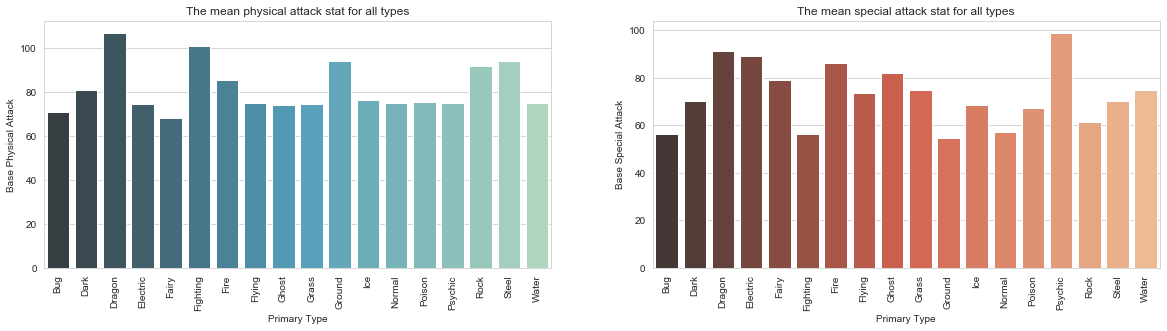

In [4]:
%matplotlib inline

sns.set_style('whitegrid')

plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
plf = poke.groupby('type_1')['attack'].mean()
plfg = sns.barplot(x=plf.index, y=plf, palette="GnBu_d")
plt.xlabel('Primary Type')
plt.ylabel('Base Physical Attack')
plt.title('The mean physical attack stat for all types')
plfg.set_xticklabels(plfg.get_xticklabels(), rotation=90)

plt.subplot(2,2,2)
plf = poke.groupby('type_1')['sp_attack'].mean()
plfg = sns.barplot(x=plf.index, y=plf, palette="OrRd_d")
plt.xlabel('Primary Type')
plt.ylabel('Base Special Attack')
plt.title('The mean special attack stat for all types')
plfg.set_xticklabels(plfg.get_xticklabels(), rotation=90)

plt.show()

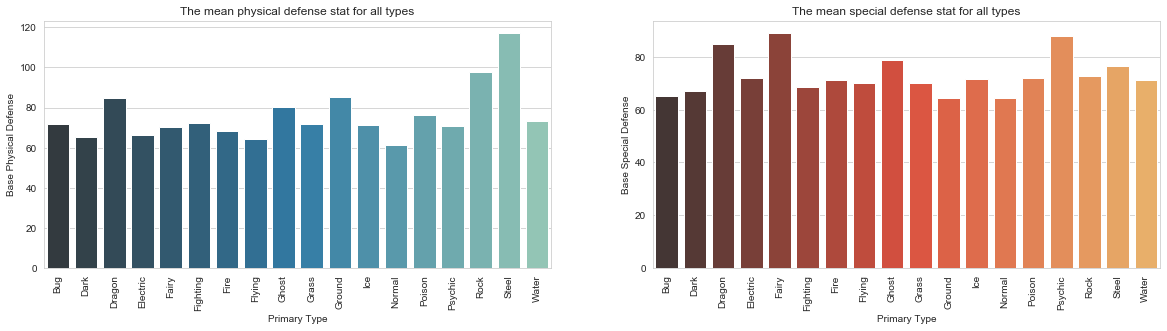

In [5]:
sns.set_style('whitegrid')

plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
plf = poke.groupby('type_1')['defense'].mean()
plfg = sns.barplot(x=plf.index, y=plf, palette="YlGnBu_d")
plt.xlabel('Primary Type')
plt.ylabel('Base Physical Defense')
plt.title('The mean physical defense stat for all types')
plfg.set_xticklabels(plfg.get_xticklabels(), rotation=90)

plt.subplot(2,2,2)
plf = poke.groupby('type_1')['sp_defense'].mean()
plfg = sns.barplot(x=plf.index, y=plf, palette="YlOrRd_d")
plt.xlabel('Primary Type')
plt.ylabel('Base Special Defense')
plt.title('The mean special defense stat for all types')
plfg.set_xticklabels(plfg.get_xticklabels(), rotation=90)

plt.show()

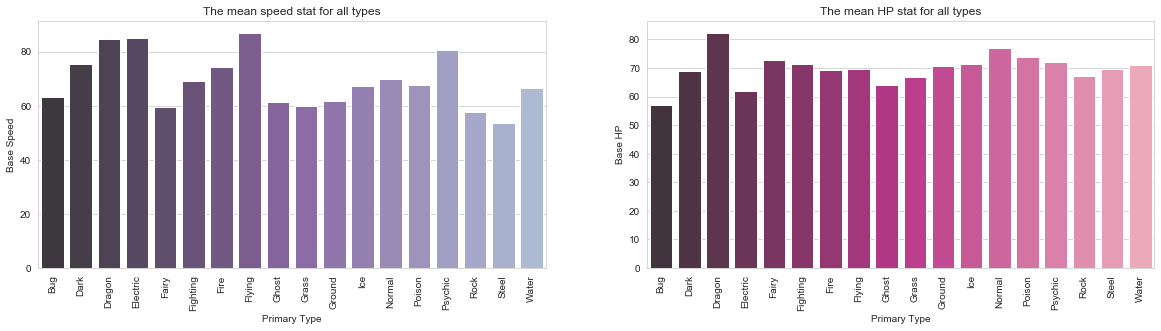

In [7]:
sns.set_style('whitegrid')

plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
plf = poke.groupby('type_1')['speed'].mean()
plfg = sns.barplot(x=plf.index, y=plf, palette="BuPu_d")
plt.xlabel('Primary Type')
plt.ylabel('Base Speed')
plt.title('The mean speed stat for all types')
plfg.set_xticklabels(plfg.get_xticklabels(), rotation=90)

plt.subplot(2,2,2)
plf = poke.groupby('type_1')['hp'].mean()
plfg = sns.barplot(x=plf.index, y=plf, palette="RdPu_d")
plt.xlabel('Primary Type')
plt.ylabel('Base HP')
plt.title('The mean HP stat for all types')
plfg.set_xticklabels(plfg.get_xticklabels(), rotation=90)

plt.show()

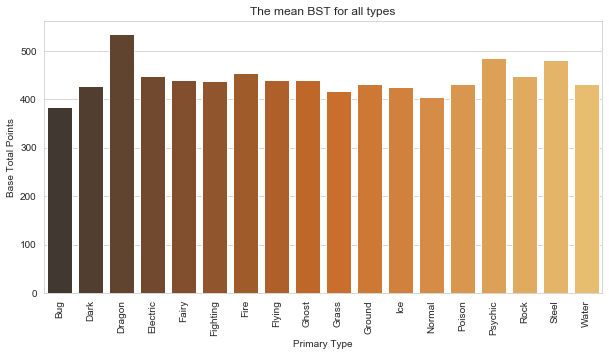

In [16]:
sns.set_style('whitegrid')

plt.figure(figsize=(10,5))
plf = poke.groupby('type_1')['total_points'].mean()
plfg = sns.barplot(x=plf.index, y=plf, palette="YlOrBr_d")
plt.xlabel('Primary Type')
plt.ylabel('Base Total Points')
plt.title('The mean BST for all types')
plfg.set_xticklabels(plfg.get_xticklabels(), rotation=90)

plt.show()

#### Top 10 Primary Types by Base Physical Attack

In [13]:
poke.groupby('type_1')['attack'].mean().sort_values(ascending=False).head(10)

type_1
Dragon      107.200000
Fighting    101.263158
Ground       94.121951
Steel        94.083333
Rock         91.783333
Fire         85.400000
Dark         80.906977
Ice          76.638889
Poison       75.538462
Normal       75.260870
Name: attack, dtype: float64

#### Top 10 Primary Types by Base Special Attack

In [12]:
poke.groupby('type_1')['sp_attack'].mean().sort_values(ascending=False).head(10)

type_1
Psychic     99.105263
Dragon      91.525000
Electric    89.377049
Fire        86.415385
Ghost       81.975610
Fairy       78.954545
Grass       75.043956
Water       75.007463
Flying      73.875000
Steel       70.138889
Name: sp_attack, dtype: float64

#### Top 10 Primary Types by Base Physical Defense

In [9]:
poke.groupby('type_1')['defense'].mean().sort_values(ascending=False).head(10)

type_1
Steel       117.388889
Rock         97.966667
Ground       85.463415
Dragon       84.775000
Ghost        80.439024
Poison       76.179487
Water        73.119403
Fighting     72.210526
Grass        71.824176
Bug          71.802469
Name: defense, dtype: float64

#### Top 10 Primary Types by Base Special Defense

In [10]:
poke.groupby('type_1')['sp_defense'].mean().sort_values(ascending=False).head(10)

type_1
Fairy       89.181818
Psychic     87.723684
Dragon      84.950000
Ghost       78.780488
Steel       76.694444
Rock        72.800000
Electric    72.016393
Poison      71.846154
Ice         71.694444
Water       71.395522
Name: sp_defense, dtype: float64

#### Top 10 Primary Types by Base Speed

In [11]:
poke.groupby('type_1')['speed'].mean().sort_values(ascending=False).head(10)

type_1
Flying      87.000000
Electric    84.901639
Dragon      84.450000
Psychic     80.592105
Dark        75.395349
Fire        74.369231
Normal      69.678261
Fighting    69.210526
Poison      67.769231
Ice         67.138889
Name: speed, dtype: float64

#### Top 10 Primary Types by Base HP

In [12]:
poke.groupby('type_1')['hp'].mean().sort_values(ascending=False).head(10)

type_1
Dragon      82.375000
Normal      77.052174
Poison      73.948718
Fairy       72.954545
Psychic     71.973684
Ice         71.500000
Fighting    71.394737
Water       70.888060
Ground      70.853659
Flying      69.625000
Name: hp, dtype: float64

#### Top 10 Primary Types by Base Total Points

In [13]:
poke.groupby('type_1')['total_points'].mean().sort_values(ascending=False).head(10)

type_1
Dragon      535.275000
Psychic     485.315789
Steel       481.472222
Fire        455.015385
Electric    449.327869
Rock        448.683333
Ghost       440.756098
Flying      440.000000
Fairy       439.272727
Fighting    439.052632
Name: total_points, dtype: float64

#### b. Physical Attributes

Now, we'll visualize the data and find out the top 10 types based on physical attributes, such as - height, weight and base experience.

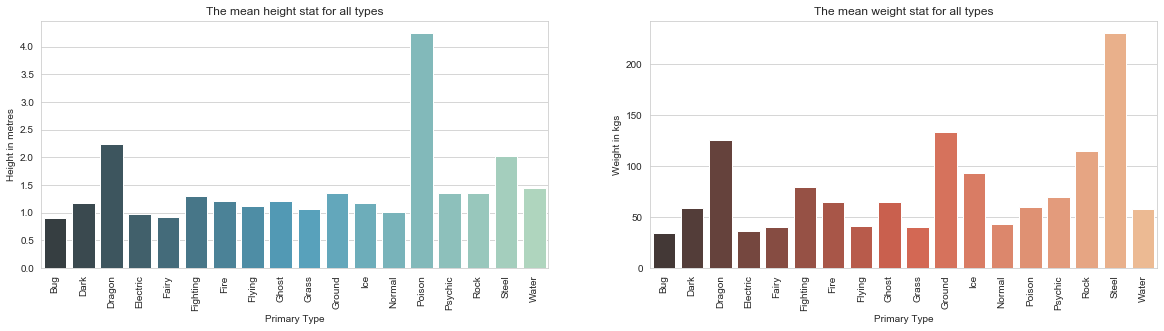

In [14]:
sns.set_style('whitegrid')

plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
plf = poke.groupby('type_1')['height_m'].mean()
plfg = sns.barplot(x=plf.index, y=plf, palette="GnBu_d")
plt.xlabel('Primary Type')
plt.ylabel('Height in metres')
plt.title('The mean height stat for all types')
plfg.set_xticklabels(plfg.get_xticklabels(), rotation=90)

plt.subplot(2,2,2)
plf = poke.groupby('type_1')['weight_kg'].mean()
plfg = sns.barplot(x=plf.index, y=plf, palette="OrRd_d")
plt.xlabel('Primary Type')
plt.ylabel('Weight in kgs')
plt.title('The mean weight stat for all types')
plfg.set_xticklabels(plfg.get_xticklabels(), rotation=90)

plt.show()

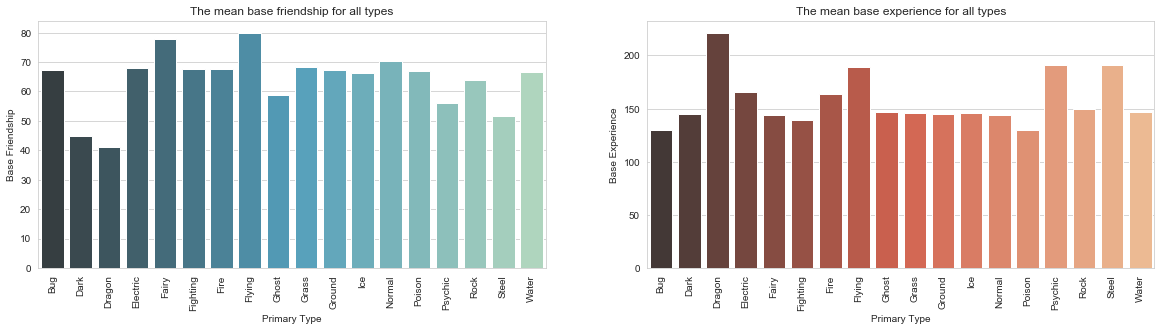

In [18]:
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
plf = poke.groupby('type_1')['base_friendship'].mean()
plfg = sns.barplot(x=plf.index, y=plf, palette="GnBu_d")
plt.xlabel('Primary Type')
plt.ylabel('Base Friendship')
plt.title('The mean base friendship for all types')
plfg.set_xticklabels(plfg.get_xticklabels(), rotation=90)

plt.subplot(2,2,2)
plf = poke.groupby('type_1')['base_experience'].mean()
plfg = sns.barplot(x=plf.index, y=plf, palette="OrRd_d")
plt.xlabel('Primary Type')
plt.ylabel('Base Experience')
plt.title('The mean base experience for all types')
plfg.set_xticklabels(plfg.get_xticklabels(), rotation=90)

plt.show()

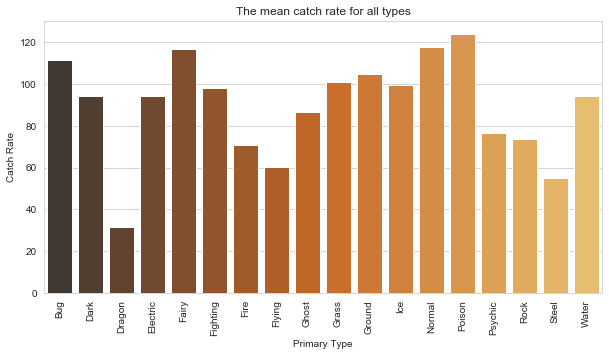

In [17]:
sns.set_style('whitegrid')

plt.figure(figsize=(10,5))
plf = poke.groupby('type_1')['catch_rate'].mean()
plfg = sns.barplot(x=plf.index, y=plf, palette="YlOrBr_d")
plt.xlabel('Primary Type')
plt.ylabel('Catch Rate')
plt.title('The mean catch rate for all types')
plfg.set_xticklabels(plfg.get_xticklabels(), rotation=90)

plt.show()

#### Top 10 Primary Types by Height (in metres)

In [19]:
poke.groupby('type_1')['height_m'].mean().sort_values(ascending=False).head(10)

type_1
Poison      4.251282
Dragon      2.247500
Steel       2.022222
Water       1.442537
Ground      1.358537
Psychic     1.350000
Rock        1.346667
Fighting    1.300000
Ghost       1.212195
Fire        1.204615
Name: height_m, dtype: float64

#### Top 10 Primary Types by Weight (in kgs)

In [20]:
poke.groupby('type_1')['weight_kg'].mean().sort_values(ascending=False).head(10)

type_1
Steel       231.113889
Ground      133.385366
Dragon      125.287500
Rock        114.481667
Ice          93.183333
Fighting     79.292105
Psychic      69.939474
Fire         65.020000
Ghost        64.360976
Poison       60.176316
Name: weight_kg, dtype: float64

#### Top 10 Primary Types by Base Friendship

In [21]:
poke.groupby('type_1')['base_friendship'].mean().sort_values(ascending=False).head(10)

type_1
Flying      80.000000
Fairy       77.777778
Normal      70.495495
Grass       68.192771
Electric    67.843137
Fighting    67.741935
Fire        67.500000
Bug         67.307692
Ground      67.222222
Poison      66.944444
Name: base_friendship, dtype: float64

#### Top 10 Primary Types by Base Experience

In [22]:
poke.groupby('type_1')['base_experience'].mean().sort_values(ascending=False).head(10)

type_1
Dragon      221.540541
Psychic     191.477612
Steel       191.448276
Flying      189.500000
Electric    165.392157
Fire        163.800000
Rock        149.232143
Ghost       146.891892
Water       146.840000
Ice         145.862069
Name: base_experience, dtype: float64

#### Top 10 Primary Types by Base Catch Rate

In [23]:
poke.groupby('type_1')['catch_rate'].mean().sort_values(ascending=False).head(10)

type_1
Poison      124.027778
Normal      117.801802
Fairy       116.944444
Bug         111.384615
Ground      104.972222
Grass       100.855422
Ice          99.862069
Fighting     98.161290
Electric     94.470588
Water        94.288000
Name: catch_rate, dtype: float64

#### 3. Filter by generations

#### a. Competitive statistics

Next, we'll analyze the dataset in terms of the released generations. We'll use Seaborn graphs to visualize the graphs. We'll take a look at the competitive statistics for the following stats - attack, special attack, defense, special defense, speed, hp and base total.

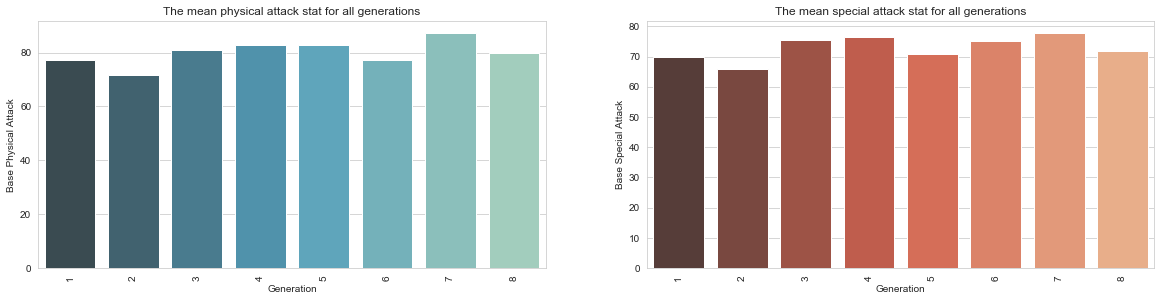

In [25]:
sns.set_style('whitegrid')

plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
plf = poke.groupby('generation')['attack'].mean()
plfg = sns.barplot(x=plf.index, y=plf, palette="GnBu_d")
plt.xlabel('Generation')
plt.ylabel('Base Physical Attack')
plt.title('The mean physical attack stat for all generations')
plfg.set_xticklabels(plfg.get_xticklabels(), rotation=90)

plt.subplot(2,2,2)
plf = poke.groupby('generation')['sp_attack'].mean()
plfg = sns.barplot(x=plf.index, y=plf, palette="OrRd_d")
plt.xlabel('Generation')
plt.ylabel('Base Special Attack')
plt.title('The mean special attack stat for all generations')
plfg.set_xticklabels(plfg.get_xticklabels(), rotation=90)

plt.show()

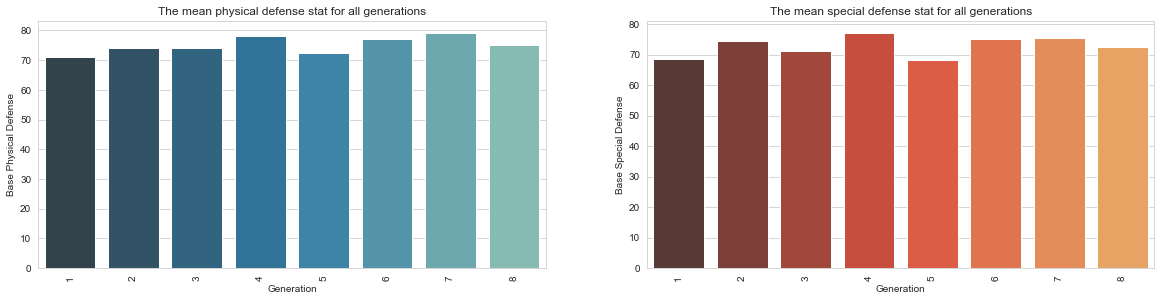

In [26]:
sns.set_style('whitegrid')

plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
plf = poke.groupby('generation')['defense'].mean()
plfg = sns.barplot(x=plf.index, y=plf, palette="YlGnBu_d")
plt.xlabel('Generation')
plt.ylabel('Base Physical Defense')
plt.title('The mean physical defense stat for all generations')
plfg.set_xticklabels(plfg.get_xticklabels(), rotation=90)

plt.subplot(2,2,2)
plf = poke.groupby('generation')['sp_defense'].mean()
plfg = sns.barplot(x=plf.index, y=plf, palette="YlOrRd_d")
plt.xlabel('Generation')
plt.ylabel('Base Special Defense')
plt.title('The mean special defense stat for all generations')
plfg.set_xticklabels(plfg.get_xticklabels(), rotation=90)

plt.show()

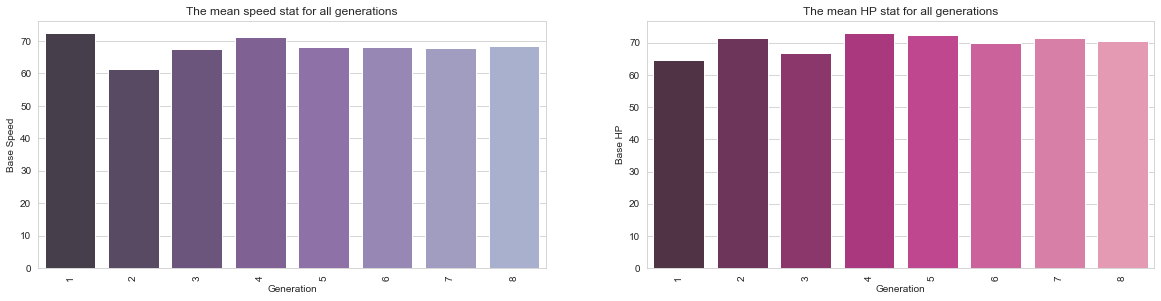

In [5]:
sns.set_style('whitegrid')

plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
plf = poke.groupby('generation')['speed'].mean()
plfg = sns.barplot(x=plf.index, y=plf, palette="BuPu_d")
plt.xlabel('Generation')
plt.ylabel('Base Speed')
plt.title('The mean speed stat for all generations')
plfg.set_xticklabels(plfg.get_xticklabels(), rotation=90)

plt.subplot(2,2,2)
plf = poke.groupby('generation')['hp'].mean()
plfg = sns.barplot(x=plf.index, y=plf, palette="RdPu_d")
plt.xlabel('Generation')
plt.ylabel('Base HP')
plt.title('The mean HP stat for all generations')
plfg.set_xticklabels(plfg.get_xticklabels(), rotation=90)

plt.show()

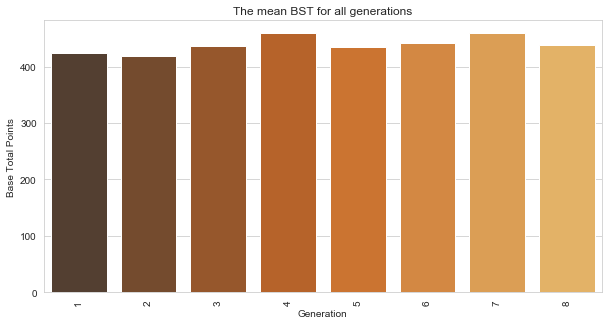

In [6]:
sns.set_style('whitegrid')

plt.figure(figsize=(10,5))
plf = poke.groupby('generation')['total_points'].mean()
plfg = sns.barplot(x=plf.index, y=plf, palette="YlOrBr_d")
plt.xlabel('Generation')
plt.ylabel('Base Total Points')
plt.title('The mean BST for all generations')
plfg.set_xticklabels(plfg.get_xticklabels(), rotation=90)

plt.show()

#### b. Physical Attributes

Now, we'll visualize the data based on physical attributes, such as - height, weight and base experience.

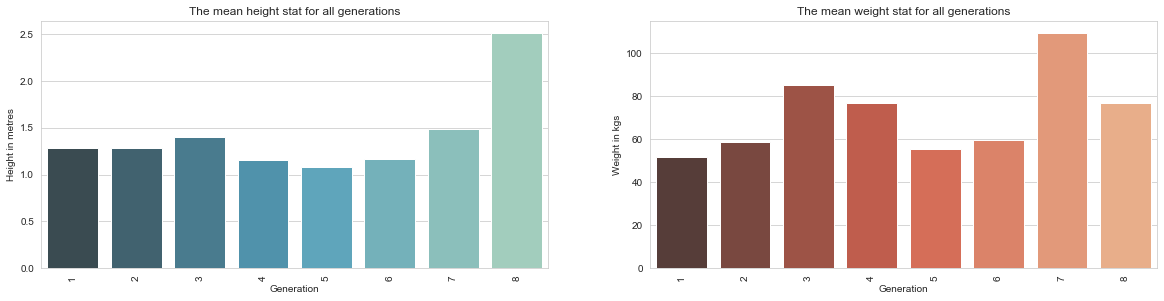

In [7]:
sns.set_style('whitegrid')

plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
plf = poke.groupby('generation')['height_m'].mean()
plfg = sns.barplot(x=plf.index, y=plf, palette="GnBu_d")
plt.xlabel('Generation')
plt.ylabel('Height in metres')
plt.title('The mean height stat for all generations')
plfg.set_xticklabels(plfg.get_xticklabels(), rotation=90)

plt.subplot(2,2,2)
plf = poke.groupby('generation')['weight_kg'].mean()
plfg = sns.barplot(x=plf.index, y=plf, palette="OrRd_d")
plt.xlabel('Generation')
plt.ylabel('Weight in kgs')
plt.title('The mean weight stat for all generations')
plfg.set_xticklabels(plfg.get_xticklabels(), rotation=90)

plt.show()

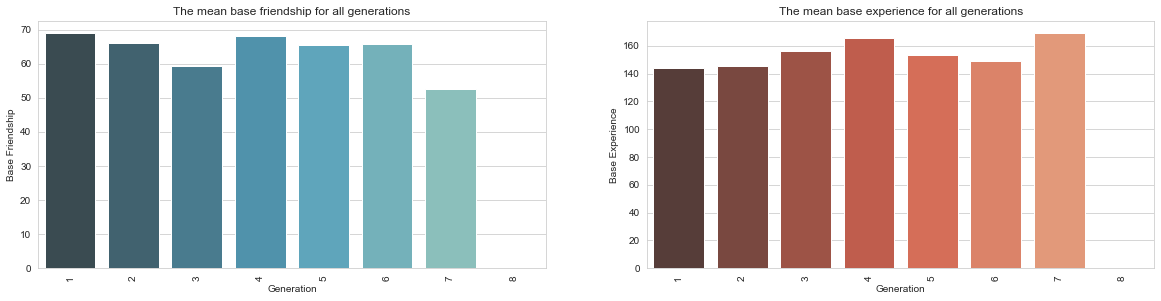

In [8]:
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
plf = poke.groupby('generation')['base_friendship'].mean()
plfg = sns.barplot(x=plf.index, y=plf, palette="GnBu_d")
plt.xlabel('Generation')
plt.ylabel('Base Friendship')
plt.title('The mean base friendship for all generations')
plfg.set_xticklabels(plfg.get_xticklabels(), rotation=90)

plt.subplot(2,2,2)
plf = poke.groupby('generation')['base_experience'].mean()
plfg = sns.barplot(x=plf.index, y=plf, palette="OrRd_d")
plt.xlabel('Generation')
plt.ylabel('Base Experience')
plt.title('The mean base experience for all generations')
plfg.set_xticklabels(plfg.get_xticklabels(), rotation=90)

plt.show()

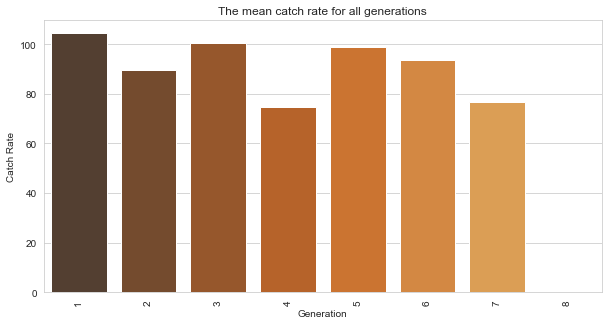

In [9]:
sns.set_style('whitegrid')

plt.figure(figsize=(10,5))
plf = poke.groupby('generation')['catch_rate'].mean()
plfg = sns.barplot(x=plf.index, y=plf, palette="YlOrBr_d")
plt.xlabel('Generation')
plt.ylabel('Catch Rate')
plt.title('The mean catch rate for all generations')
plfg.set_xticklabels(plfg.get_xticklabels(), rotation=90)

plt.show()

#### 4. Filter by Pokemon category

Now, let's compare between the different categories of Pokemon, starting off between the legendary, sub legendary and mythical.

#### a. Legendary vs Sub Legendary vs Mythical

Firstly, we'll compare legendary, sub legendary and mythical Pokemon alongside regular Pokemon, especially in terms of total base points, which is the culmination of all the stats of Pokemon. Before that, we need to change the values for the betterment of the data visualization.

In [8]:
d = {1: 'Legendary', 0: 'Non Legendary'}
e = {1: 'Sub-Legendary', 0: 'Non Sub-Legendary'}
f = {1: 'Mythical', 0: 'Non Mythical'}
poke['is_legendary'] = poke['is_legendary'].map(d)
poke['is_sub_legendary'] = poke['is_sub_legendary'].map(e)
poke['is_mythical'] = poke['is_mythical'].map(f)

poke.head()

,Unnamed: 0,pokedex_number,name,german_name,japanese_name,generation,is_sub_legendary,is_legendary,is_mythical,species,...,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy
0,0,1,Bulbasaur,Bisasam,フシギダネ (Fushigidane),1,Non Sub-Legendary,Non Legendary,Non Mythical,Seed Pokémon,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
1,1,2,Ivysaur,Bisaknosp,フシギソウ (Fushigisou),1,Non Sub-Legendary,Non Legendary,Non Mythical,Seed Pokémon,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
2,2,3,Venusaur,Bisaflor,フシギバナ (Fushigibana),1,Non Sub-Legendary,Non Legendary,Non Mythical,Seed Pokémon,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
3,3,3,Mega Venusaur,Bisaflor,フシギバナ (Fushigibana),1,Non Sub-Legendary,Non Legendary,Non Mythical,Seed Pokémon,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
4,4,4,Charmander,Glumanda,ヒトカゲ (Hitokage),1,Non Sub-Legendary,Non Legendary,Non Mythical,Lizard Pokémon,...,2.0,1.0,1.0,0.5,2.0,1.0,1.0,1.0,0.5,0.5


Now, we try to seperate the regular Pokemon from the legendary, sub legendary and mythical Pokemon is seperate dataframes, and then compare them using graphs.

In [14]:
legend = poke[(poke['is_sub_legendary'] != 'Sub-Legendary') & (poke['is_mythical'] != 'Mythical')]
sub_legend = poke[(poke['is_legendary'] != 'Legendary') & (poke['is_mythical'] != 'Mythical')]
myth = poke[(poke['is_sub_legendary'] != 'Sub-Legendary') & (poke['is_legendary'] != 'Legendary')]

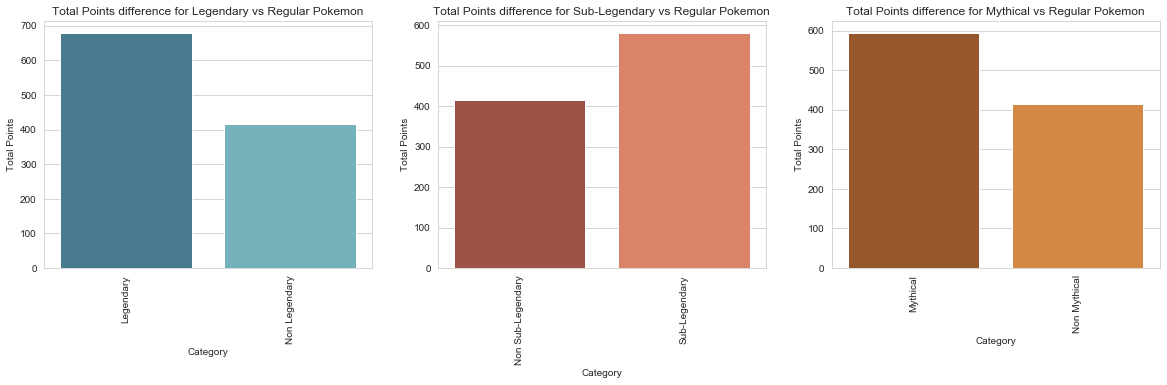

In [15]:
plt.figure(figsize=(20,10))
plt.subplot(2,3,1)
plf = legend.groupby('is_legendary')['total_points'].mean()
plfg = sns.barplot(x=plf.index, y=plf, palette="GnBu_d")
plt.xlabel('Category')
plt.ylabel('Total Points')
plt.title('Total Points difference for Legendary vs Regular Pokemon')
plfg.set_xticklabels(plfg.get_xticklabels(), rotation=90)

plt.subplot(2,3,2)
plf = sub_legend.groupby('is_sub_legendary')['total_points'].mean()
plfg = sns.barplot(x=plf.index, y=plf, palette="OrRd_d")
plt.xlabel('Category')
plt.ylabel('Total Points')
plt.title('Total Points difference for Sub-Legendary vs Regular Pokemon')
plfg.set_xticklabels(plfg.get_xticklabels(), rotation=90)

plt.subplot(2,3,3)
plf = myth.groupby('is_mythical')['total_points'].mean()
plfg = sns.barplot(x=plf.index, y=plf, palette="YlOrBr_d")
plt.xlabel('Category')
plt.ylabel('Total Points')
plt.title('Total Points difference for Mythical vs Regular Pokemon')
plfg.set_xticklabels(plfg.get_xticklabels(), rotation=90)
plt.show()

Comparing the three graphs side-by-side, we can come to the conclusion that, 
#### Legendaries have the highest mean total points, followed by mythicals and sub-legendaries and finally regular Pokemon. 